<a href="https://colab.research.google.com/github/oms77/Reopen/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sample = pd.read_csv("/content/sample_data/sample_submission.csv")

In [ ]:
sample.head()

,member_id,loan_status
0,11937648,0.5
1,38983318,0.5
2,27999917,0.5
3,61514932,0.5
4,59622821,0.5


In [ ]:
train_data = pd.read_csv("/content/sample_data/train_indessa.csv")

In [ ]:
train_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [ ]:
test_data = pd.read_csv("/content/sample_data/test_indessa.csv")

In [ ]:
test_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [ ]:
a = dict(train_data.isnull().sum())

In [ ]:
b = {}
for x,y in a.items():
  if y>0:
    b[x] = (y/len(train_data))*100

In [ ]:
b

{'batch_enrolled': 15.99258491288963,
 'emp_title': 5.791017752635098,
 'emp_length': 5.05063595453282,
 'annual_inc': 0.0005634564673533323,
 'desc': 85.80108484151849,
 'title': 0.01690369402059997,
 'delinq_2yrs': 0.0030051011592177723,
 'inq_last_6mths': 0.0030051011592177723,
 'mths_since_last_delinq': 51.19077133434005,
 'mths_since_last_record': 84.57575484384743,
 'open_acc': 0.0030051011592177723,
 'pub_rec': 0.0030051011592177723,
 'revol_util': 0.053904002043468784,
 'total_acc': 0.0030051011592177723,
 'collections_12_mths_ex_med': 0.01784278813285552,
 'mths_since_last_major_derog': 75.02385299045129,
 'verification_status_joint': 99.94271525915241,
 'acc_now_delinq': 0.0030051011592177723,
 'tot_coll_amt': 7.889141818236456,
 'tot_cur_bal': 7.889141818236456,
 'total_rev_hi_lim': 7.889141818236456}

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [ ]:
train_data[train_data['open_acc'].isnull()]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
152427,70473,4350,4350,825.0,36 months,BAT4347689,8.07,A,A4,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
158498,85667,1000,1000,625.0,36 months,BAT2331079,14.07,E,E3,Macy's,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
170053,70735,6500,6500,0.0,36 months,BAT2331079,8.38,A,A5,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
198875,79906,7000,7000,3450.0,36 months,BAT4347689,7.75,A,A3,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
206905,72816,7200,5075,350.0,36 months,BAT5869156,10.28,C,C1,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
212464,76623,1275,1275,0.0,36 months,BAT2331079,12.49,D,D3,Infinitely law group,...,NaN,NaN,INDIVIDUAL,NaN,48th week,NaN,NaN,NaN,NaN,0
283835,72992,1000,1000,0.0,36 months,BAT2331079,9.64,B,B4,Halping hands company inc.,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
325674,74301,6500,6500,0.0,36 months,BAT2331079,9.64,B,B4,Air Force,...,NaN,NaN,INDIVIDUAL,NaN,48th week,NaN,NaN,NaN,NaN,0
337233,83471,2600,2600,575.0,36 months,BAT2331079,8.38,A,A5,College Pro Painters,...,NaN,NaN,INDIVIDUAL,NaN,143th week,NaN,NaN,NaN,NaN,0
392373,85923,1200,1200,500.0,36 months,BAT2331079,9.01,B,B2,Classic Components,...,NaN,NaN,INDIVIDUAL,NaN,161th week,NaN,NaN,NaN,NaN,1


In [ ]:
train_data.corr()['loan_status'].sort_values()

member_id                     -0.489753
dti                           -0.134020
funded_amnt_inv               -0.101877
funded_amnt                   -0.097563
loan_amnt                     -0.095713
open_acc                      -0.065048
recoveries                    -0.062084
pub_rec                       -0.048884
revol_util                    -0.047196
delinq_2yrs                   -0.045717
collection_recovery_fee       -0.042823
revol_bal                     -0.040051
collections_12_mths_ex_med    -0.033922
total_rev_hi_lim              -0.019547
acc_now_delinq                -0.014415
tot_coll_amt                  -0.013165
mths_since_last_major_derog   -0.010214
annual_inc                    -0.008596
total_rec_late_fee            -0.004353
total_acc                     -0.002631
int_rate                       0.002590
tot_cur_bal                    0.014579
mths_since_last_delinq         0.029236
total_rec_int                  0.038344
mths_since_last_record         0.073566


In [ ]:
num_data = train_data.select_dtypes(exclude='object')

In [ ]:
num_data

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,19.19,28700.0,33.88,0.0,1.0,50.0,...,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,10.99,65000.0,3.64,0.0,1.0,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,7.26,45000.0,18.42,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,19.72,105000.0,14.97,0.0,2.0,46.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,10.64,52000.0,20.16,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,12.49,75000.0,14.53,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,14.99,59000.0,22.97,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,20.80,42504.0,27.27,0.0,1.0,26.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,16.29,50000.0,14.91,0.0,1.0,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,29197.0,23300.0,0


In [ ]:
num_data.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
annual_inc                          3
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         95
mths_since_last_major_derog    399448
acc_now_delinq                     16
tot_coll_amt                    42004
tot_cur_bal                     42004
total_rev_hi_lim                42004
loan_status 

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [ ]:
d1 = pd.DataFrame(imputer.fit_transform(num_data))

In [ ]:
d1

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,58189336.0,14350.0,14350.0,14350.0,19.19,28700.0,33.88,0.0,1.0,50.000000,...,0.0,0.0,0.0,0.0,74.000000,0.0,0.0,28699.0,30800.0,0.0
1,70011223.0,4800.0,4800.0,4800.0,10.99,65000.0,3.64,0.0,1.0,34.055735,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,9974.0,32900.0,0.0
2,70255675.0,10000.0,10000.0,10000.0,7.26,45000.0,18.42,0.0,0.0,34.055735,...,0.0,0.0,0.0,0.0,44.121462,0.0,65.0,38295.0,34900.0,0.0
3,1893936.0,15000.0,15000.0,15000.0,19.72,105000.0,14.97,0.0,2.0,46.000000,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,55564.0,24700.0,0.0
4,7652106.0,16000.0,16000.0,16000.0,10.64,52000.0,20.16,0.0,0.0,34.055735,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,47159.0,47033.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187.0,20000.0,20000.0,20000.0,12.49,75000.0,14.53,0.0,0.0,34.055735,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,83087.0,24800.0,0.0
532424,29403184.0,12000.0,12000.0,12000.0,14.99,59000.0,22.97,0.0,0.0,34.055735,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,227812.0,17800.0,0.0
532425,7357607.0,18725.0,18725.0,18725.0,20.80,42504.0,27.27,0.0,1.0,26.000000,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,26010.0,24200.0,1.0
532426,23182668.0,21000.0,21000.0,21000.0,16.29,50000.0,14.91,0.0,1.0,34.055735,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,29197.0,23300.0,0.0


In [ ]:
d1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
dtype: int64

In [ ]:
obj_data = train_data.select_dtypes(include='object')

In [ ]:
obj_data.head()

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,last_week_pay
0,36 months,,E,E3,clerk,9 years,OWN,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,f,INDIVIDUAL,NaN,26th week
1,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,w,INDIVIDUAL,NaN,9th week
2,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,w,INDIVIDUAL,NaN,9th week
3,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,f,INDIVIDUAL,NaN,135th week
4,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,NaN,credit_card,refi,900xx,CA,w,INDIVIDUAL,NaN,96th week


In [ ]:
obj_data.isnull().sum()

term                              0
batch_enrolled                85149
grade                             0
sub_grade                         0
emp_title                     30833
emp_length                    26891
home_ownership                    0
verification_status               0
pymnt_plan                        0
desc                         456829
purpose                           0
title                            90
zip_code                          0
addr_state                        0
initial_list_status               0
application_type                  0
verification_status_joint    532123
last_week_pay                     0
dtype: int64

In [ ]:
obj_data['batch_enrolled'] = obj_data['batch_enrolled'].fillna('None')

In [ ]:
obj_data['verification_status_joint'] = obj_data['verification_status_joint'].fillna('None')

In [ ]:
obj_data['emp_length'] = obj_data['emp_length'].fillna('None')

In [ ]:
obj_data['emp_title'] = obj_data['emp_title'].fillna('None')

In [ ]:
obj_data['desc'] = obj_data['desc'].fillna('None')

In [ ]:
obj_data['title'] = obj_data['title'].fillna('None')

In [ ]:
obj_data.isnull().sum()

term                         0
batch_enrolled               0
grade                        0
sub_grade                    0
emp_title                    0
emp_length                   0
home_ownership               0
verification_status          0
pymnt_plan                   0
desc                         0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
initial_list_status          0
application_type             0
verification_status_joint    0
last_week_pay                0
dtype: int64

In [ ]:
final_train = pd.concat([obj_data,d1],axis=1)

In [ ]:
final_train.head()

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,...,17,18,19,20,21,22,23,24,25,26
0,36 months,,E,E3,clerk,9 years,OWN,Source Verified,n,None,...,0.0,0.0,0.0,0.0,74.000000,0.0,0.0,28699.0,30800.0,0.0
1,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,None,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,9974.0,32900.0,0.0
2,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,None,...,0.0,0.0,0.0,0.0,44.121462,0.0,65.0,38295.0,34900.0,0.0
3,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,55564.0,24700.0,0.0
4,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,None,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,47159.0,47033.0,0.0


In [ ]:
final_train.isnull().sum()

term                         0
batch_enrolled               0
grade                        0
sub_grade                    0
emp_title                    0
emp_length                   0
home_ownership               0
verification_status          0
pymnt_plan                   0
desc                         0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
initial_list_status          0
application_type             0
verification_status_joint    0
last_week_pay                0
0                            0
1                            0
2                            0
3                            0
4                            0
5                            0
6                            0
7                            0
8                            0
9                            0
10                           0
11                           0
12                           0
13                           0
14      

In [ ]:
final_train.corr()[26].sort_values()

0    -0.489753
6    -0.134020
3    -0.101877
2    -0.097563
1    -0.095713
11   -0.065045
18   -0.062084
12   -0.048882
14   -0.047179
7    -0.045715
19   -0.042823
13   -0.040051
20   -0.033915
25   -0.017275
22   -0.014414
23   -0.011635
5    -0.008596
21   -0.004562
17   -0.004353
15   -0.002631
4     0.002590
24    0.012884
9     0.019752
10    0.026949
16    0.038344
8     0.087335
26    1.000000
Name: 26, dtype: float64

In [ ]:
num_data['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [ ]:
final_train[26].value_counts()

0.0    406601
1.0    125827
Name: 26, dtype: int64

<Axes: xlabel='8', ylabel='26'>

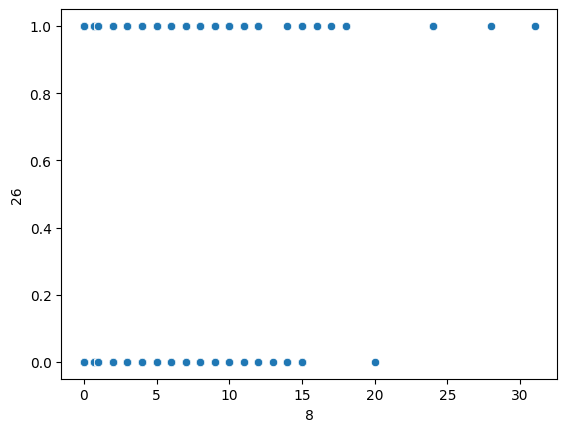

In [ ]:
sns.scatterplot(data=final_train,x=8,y=26)

In [ ]:
idx = final_train[final_train[8]>25].index

In [ ]:
final_train.shape

(532428, 45)

In [ ]:
final_train = final_train.drop(idx)

In [ ]:
final_train.shape

(532426, 45)

<Axes: xlabel='26', ylabel='count'>

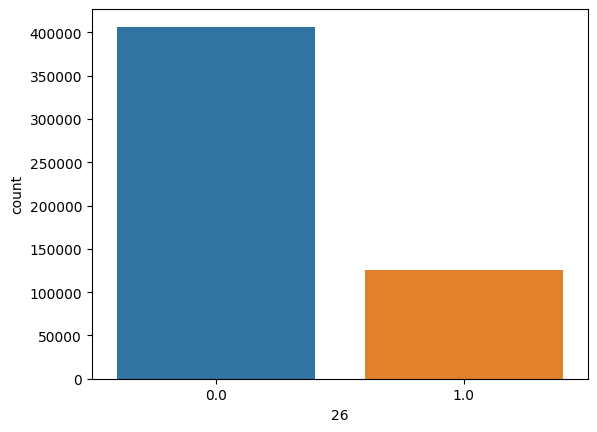

In [ ]:
sns.countplot(data=final_train,x=26)

<Axes: >

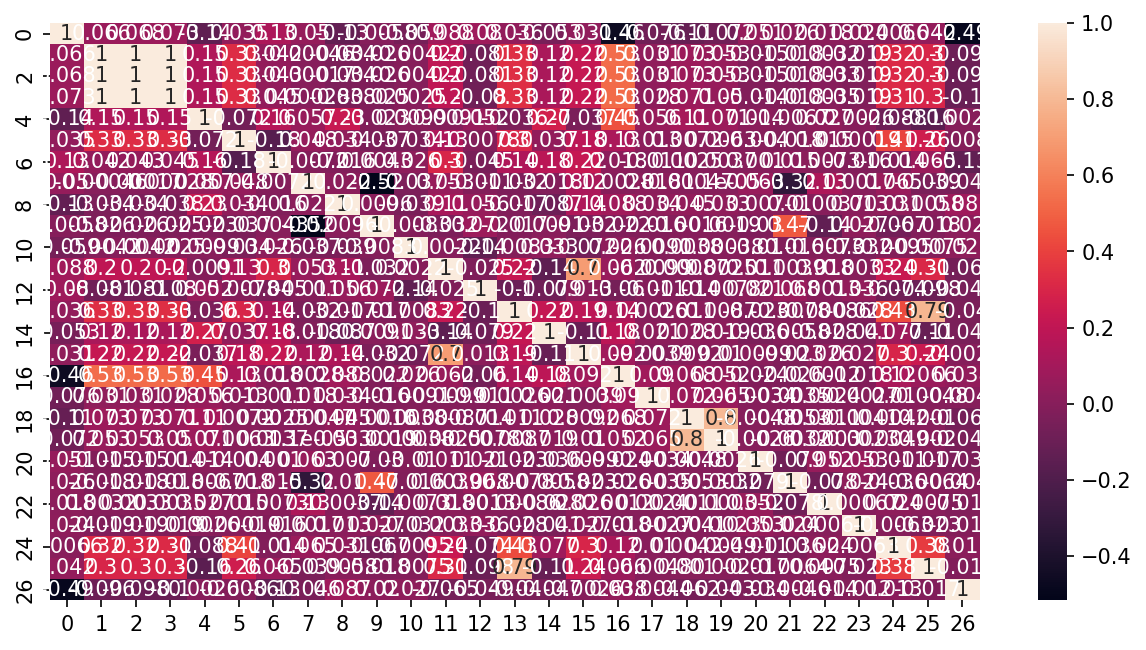

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
sns.heatmap(final_train.corr(),annot=True)

In [ ]:
final_train.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'j',10:'k',11:'l',12:'m',13:'n',14:'o',15:'p',16:'q',17:'r',18:'s',19:'t',20:'u',21:'v',22:'w',23:'x',24:'y',25:'z',26:'loan_status'},inplace=True)

In [ ]:
final_train.head()

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,...,r,s,t,u,v,w,x,y,z,loan_status
0,36 months,,E,E3,clerk,9 years,OWN,Source Verified,n,None,...,0.0,0.0,0.0,0.0,74.000000,0.0,0.0,28699.0,30800.0,0.0
1,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,None,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,9974.0,32900.0,0.0
2,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,None,...,0.0,0.0,0.0,0.0,44.121462,0.0,65.0,38295.0,34900.0,0.0
3,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,55564.0,24700.0,0.0
4,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,None,...,0.0,0.0,0.0,0.0,44.121462,0.0,0.0,47159.0,47033.0,0.0


In [ ]:
nn = final_train.select_dtypes(exclude='object')

In [ ]:
from sklearn.model_selection import train_test_split

x = nn.drop('loan_status',axis=1)
y = nn['loan_status']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#help(GradientBoostingClassifier)

In [ ]:
bg = GradientBoostingClassifier()
param_grid = {'learning_rate':[0.01,0.05,0.1,0.2],'n_estimators':[64,100,128,200],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}

In [ ]:
grid = GridSearchCV(bg,param_grid)